## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [45]:
# ваш код здесь

dict_map = {'Yes': 1, "No": 0}
df = df.drop('State', axis=1)
df['International plan'] =df['International plan'].map(dict_map)
df['Voice mail plan'] = df['Voice mail plan'].map(dict_map)
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [46]:
# ваш код здесь
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [47]:
# ваш код здесь
target = 'Churn'
X = df.drop(target, axis=1)
y = df[target]

Проверьте баланс классов. Является ли выборка сбалансированной?

In [48]:
# ваш код здесь
y.value_counts(normalize=True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [49]:
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [50]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [51]:
# ваш код здесь
X_train_scaler = pd.DataFrame(X_train_scaler)
X_test_scaler = pd.DataFrame(X_test_scaler)


Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь

# Обучение логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X_train_scaler, y_train)

# Обучение метода опорных векторов с kernel='linear'
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train_scaler, y_train);

In [53]:
X_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,80,510,0,0,0,202.4,118,34.41,260.2,67,22.12,177.4,112,7.98,9.2,5,2.48,3
1362,63,510,0,0,0,132.9,122,22.59,67.0,62,5.70,160.4,121,7.22,9.9,2,2.67,3
2670,116,510,0,1,12,221.0,108,37.57,151.0,118,12.84,179.0,80,8.06,9.0,6,2.43,2
2210,71,415,0,0,0,278.9,110,47.41,190.2,67,16.17,255.2,84,11.48,11.7,7,3.16,0
1846,120,510,0,1,43,177.9,117,30.24,175.1,70,14.88,161.3,117,7.26,11.5,4,3.11,1


In [54]:
log_reg.predict_proba(X_test_scaler)

array([[0.78637816, 0.21362184],
       [0.97503509, 0.02496491],
       [0.97203789, 0.02796211],
       ...,
       [0.96506844, 0.03493156],
       [0.91896315, 0.08103685],
       [0.98782447, 0.01217553]])

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [57]:
from sklearn.metrics import roc_auc_score

# ваш код здесь
y_pred_proba_log = log_reg.predict_proba(X_test_scaler)[:, 1]
y_pred_proba_svc = svc.predict_proba(X_test_scaler)[:, 1]
print("ROC AUC LOG REG:", roc_auc_score(y_test, y_pred_proba_log))
print("ROC AUC SVC:", roc_auc_score(y_test, y_pred_proba_svc))


ROC AUC LOG REG: 0.8282102961216148
ROC AUC SVC: 0.7401816386647192


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [58]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC on the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC after scaler:", roc_auc)

ROC AUC: 0.8362151267635516


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [59]:
# ваш код здесь
clf = DecisionTreeClassifier()
clf.fit(X_train_scaler, y_train)

# Make predictions on the test set
y_pred_proba = clf.predict_proba(X_test_scaler)[:, 1]

# Calculate ROC AUC on the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC before scaler:", roc_auc)

ROC AUC before scaler: 0.8298014704082383


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

После масшитабирования качество немного упало, поэтому масштабировать признаки не нужно

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [65]:
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Linear Model
param_grid_lr = {'C': [np.round(i*0.1, 2) for i in range(1, 21)]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train_scaler, y_train)
print("Best parameters for Linear Model:", grid_search_lr.best_params_)
print("Best score for Linear Model:", grid_search_lr.best_score_)

# Decision Tree
param_grid_dt = {'max_depth': range(1, 11), 'criterion': ['gini', 'entropy']}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Linear Model: {'C': 0.7}
Best score for Linear Model: 0.8028298465643863
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4}
Best score for Decision Tree: 0.8747349177703349


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?


Решающее дерево с задачей справилось лучше.

Нарисуйте roc-кривую для наилучшей модели.

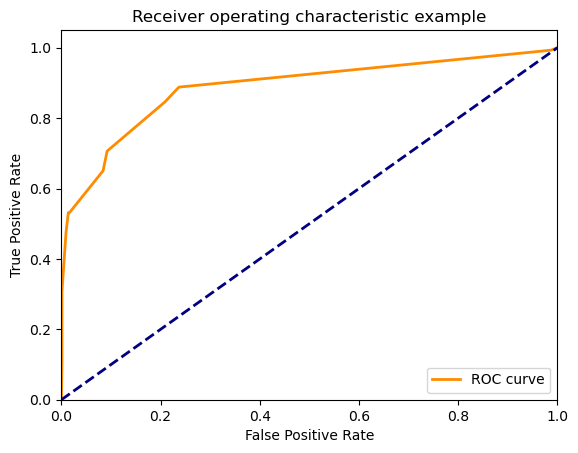

In [68]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

# ваш код здесь

y_pred_proba = grid_search_dt.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [78]:
# ваш код здесь

model_lr = grid_search_lr.best_estimator_
model_clf = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_proba_clf = model_clf.predict_proba(X_test)[:, 1]
y_pred_proba_lr = model_lr.predict_proba(X_test_scaler)[:, 1]

# Calculate ROC AUC on the test set
roc_auc_clf = roc_auc_score(y_test, y_pred_proba_clf)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print("ROC AUC difference %:", np.round((roc_auc_clf-roc_auc_lr) * 100, 3))

ROC AUC difference %: 5.77


In [94]:
# ваш код здесь
top_features_lr = pd.DataFrame({"Features": np.array(X_test.columns),"Coef": abs(np.array(model_lr.coef_)).reshape(-1)}).sort_values(by='Coef', ascending=False)
top_features_lr[:3]

,Features,Coef
17,Customer service calls,0.662080
2,International plan,0.630692
3,Voice mail plan,0.610055


In [96]:
top_features_lr = pd.DataFrame({"Features": np.array(X_test.columns),"Coef": abs(np.array(model_clf.feature_importances_)).reshape(-1)}).sort_values(by='Coef', ascending=False)
top_features_lr[:3]

,Features,Coef
5,Total day minutes,0.355748
17,Customer service calls,0.189853
2,International plan,0.149394


Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

Данные не являются сбалансированными, то есть количество одного класса в данных больше количества другого.

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

Решающее дерево

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

Разные, потому что логистическая регрессия ищет только линейные зависимости, а решающее дерево может искать не только линейные зависимости, а также нелинейные.